Introduction

Les Accidents Vasculaires Cérébraux (AVC) représentent l'une des principales causes de décès et d'invalidité dans le monde. Détecter les risques d'AVC de manière précoce permettrait de sauver de nombreuses vies et de réduire considérablement les séquelles chez les patients.

Ce projet vise à construire un modèle de prédiction du risque d'AVC à l’aide de bibliothèques Python telles que pandas, scikit-learn, matplotlib et seaborn. L’objectif est de permettre aux professionnels de la santé ou aux chercheurs d’avoir un outil simple qui aide à évaluer automatiquement le niveau de risque d’un patient, en fonction de certains paramètres médicaux.



In [1]:
#Importation des bibliothèques
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
#Mounting drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


 ***__Exploration des donnés___***:





In [3]:
#Chargement des données
df=pd.read_csv('/content/gdrive/MyDrive/FOR NEXA/Stroke_Prediction/stroke_data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
#Dimension de la dataset
print(f"le nombre d'observations est {df.shape[0]}")
print(f"le nombre de variables est {df.shape[1]}")

le nombre d'observations est 5110
le nombre de variables est 12


In [5]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,201


 Informations générales sur les données (df.info())
Le dataset contient 12 colonnes :

 * Une colonne d’identifiant : id (sera ignorée car elle ne contient aucune information utile pour la modélisation).

 * 10 colonnes de variables explicatives, représentant des caractéristiques démographiques ou cliniques des patients (comme l’âge, le sexe, l’IMC, le statut de fumeur, etc.).

 * 1 colonne cible : stroke, indiquant si le patient a eu un AVC (1) ou non (0).

Lors de l’inspection des données avec la méthode df.isnull().sum(), nous constatons que :

Le dataset contient quelques valeurs manquantes dans la colonne bmi (Indice de Masse Corporelle). Ce problème sera traité plus loin par une stratégie de remplacement appropriée.

Toutes les autres colonnes sont complètes.

Certaines colonnes sont de type catégoriel (object) et devront être encodées numériquement avant l'entraînement du modèle.



In [7]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [8]:
for col in df.select_dtypes(include='object').columns:
  print(f"{col}: {df[col].unique}")

gender: <bound method Series.unique of 0         Male
1       Female
2         Male
3       Female
4       Female
         ...  
5105    Female
5106    Female
5107    Female
5108      Male
5109    Female
Name: gender, Length: 5110, dtype: object>
ever_married: <bound method Series.unique of 0       Yes
1       Yes
2       Yes
3       Yes
4       Yes
       ... 
5105    Yes
5106    Yes
5107    Yes
5108    Yes
5109    Yes
Name: ever_married, Length: 5110, dtype: object>
work_type: <bound method Series.unique of 0             Private
1       Self-employed
2             Private
3             Private
4       Self-employed
            ...      
5105          Private
5106    Self-employed
5107    Self-employed
5108          Private
5109         Govt_job
Name: work_type, Length: 5110, dtype: object>
Residence_type: <bound method Series.unique of 0       Urban
1       Rural
2       Rural
3       Urban
4       Rural
        ...  
5105    Urban
5106    Urban
5107    Rural
5108    Rural
5109    Ur

In [9]:
for col in df.select_dtypes(include='float64').columns:
  print(f"{col}: {df[col].unique}")

age: <bound method Series.unique of 0       67.0
1       61.0
2       80.0
3       49.0
4       79.0
        ... 
5105    80.0
5106    81.0
5107    35.0
5108    51.0
5109    44.0
Name: age, Length: 5110, dtype: float64>
avg_glucose_level: <bound method Series.unique of 0       228.69
1       202.21
2       105.92
3       171.23
4       174.12
         ...  
5105     83.75
5106    125.20
5107     82.99
5108    166.29
5109     85.28
Name: avg_glucose_level, Length: 5110, dtype: float64>
bmi: <bound method Series.unique of 0       36.6
1        NaN
2       32.5
3       34.4
4       24.0
        ... 
5105     NaN
5106    40.0
5107    30.6
5108    25.6
5109    26.2
Name: bmi, Length: 5110, dtype: float64>


In [10]:
df['stroke'].value_counts(normalize='True')*100

,proportion
stroke,
0,95.127202
1,4.872798


**Remarque sur la colonne cible:**

la colonne cible est déquilibrée, la majorité des cas sont non stroke, ce qui risuqe de destabiliser la prédiciton.Un modèle non performant peut tout simplement prédire toutes les valeurs des 0.

In [11]:
df['gender'].value_counts(normalize='True')*100

,proportion
gender,
Female,58.590998
Male,41.389432
Other,0.019569


Anallyse de la variable 'gender'
lors de l'inspection de la variable 'gender', on constate que la catégorie other est très rare (elle ne se présente qu'ne seule fois), sa présence est donce statistiquement négligeable et risque de perturber les modèles de classification...  

__Visualisation intelligente__

In [12]:
sb.set(style='whitegrid')

Text(0.5, 1.0, "Ditribution de l'age selon l'AVC")

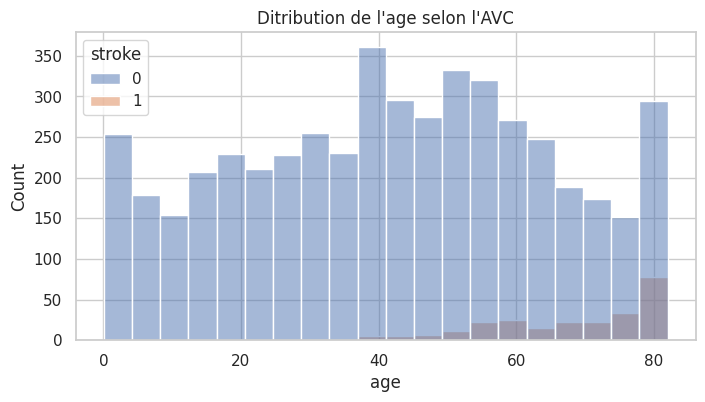

In [13]:
#Analyse de la relation entre l'age et l'AVC
plt.figure(figsize=(8,4))
sb.histplot(data=df, x='age', hue='stroke')
plt.title("Ditribution de l'age selon l'AVC" )

Analyse de l'influence de l'age sur AVC:
En analysant l'hstogramme de l'age face à AVC, on cnstate que plus une personne est agée, plus le risque de l'AVC augmente.  L’âge jouera certainement un rôle important dans la performance des modèles prédictifs

In [35]:
df_age_inf_40=df[df['age']<=40]
df_age_inf_40.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
49,36338,Female,39.00,1,0,Yes,Private,Rural,58.09,39.2,smokes,1
118,31720,Female,38.00,0,0,No,Self-employed,Urban,82.28,24.0,formerly smoked,1
133,31563,Female,38.00,0,0,Yes,Private,Rural,101.45,NaN,formerly smoked,1
162,69768,Female,1.32,0,0,No,children,Urban,70.37,NaN,Unknown,1
182,39912,Female,32.00,0,0,Yes,Private,Rural,76.13,29.9,smokes,1


In [36]:
df_age_sup_40=df[df['age']>=40]
df_age_sup_40.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [38]:
stroke_inf_40=df_age_inf_40['stroke'].value_counts()
stroke_sup_40=df_age_sup_40['stroke'].value_counts()

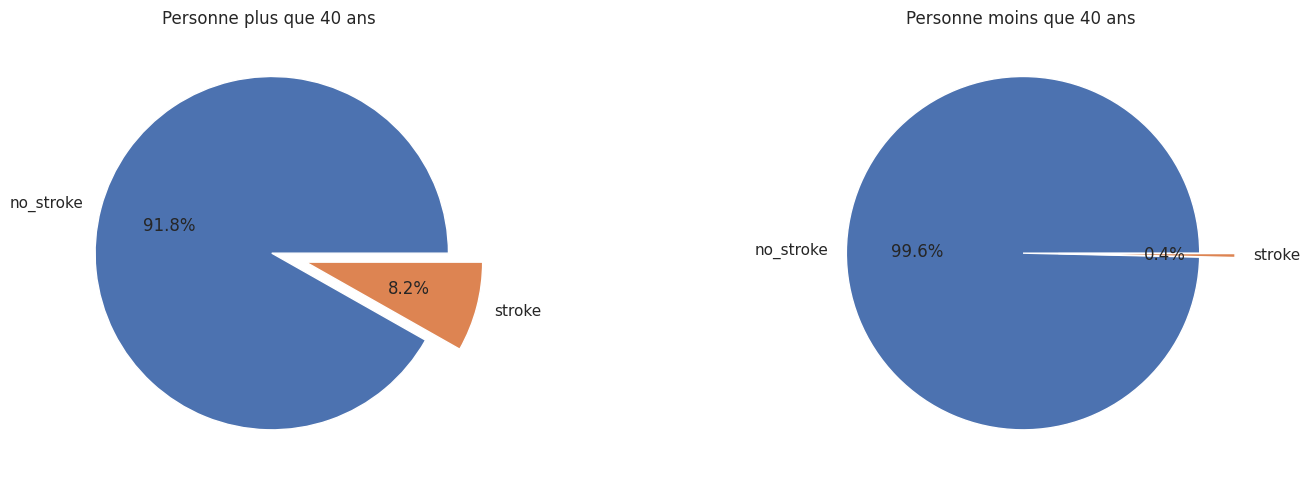

In [39]:
label=['no_stroke', 'stroke']
plt.figure(figsize=(16, 5))
plt.subplot(1, 2, 1)
plt.pie(stroke_sup_40, labels=label, autopct='%1.1f%%', explode=(0 , 0.2))
plt.title('Personne plus que 40 ans ')
plt.subplot(1 , 2 , 2 )
plt.pie(stroke_inf_40, labels=label, autopct='%1.1f%%', explode=(0 , 0.2))
plt.title('Personne moins que 40 ans ')
plt.tight_layout()

Text(0.5, 1.0, "Dsitribution du sexe selon l'AVC")

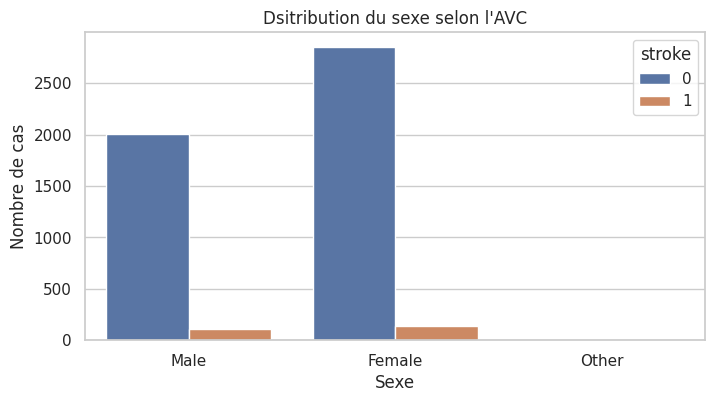

In [ ]:
#Analyse de la relation entre le sexe et l'AVC
plt.figure(figsize=(8,4))
sb.countplot(data=df, x='gender', hue='stroke')
plt.xlabel('Sexe')
plt.ylabel('Nombre de cas')
plt.title("Dsitribution du sexe selon l'AVC")

In [50]:
df_male=df[df['gender']=='Male']
df_female=df[df['gender']=='Female']

In [53]:
stroke_male=df_male['stroke'].value_counts()
stroke_female=df_female['stroke'].value_counts()

Text(0.5, 1.0, 'Female')

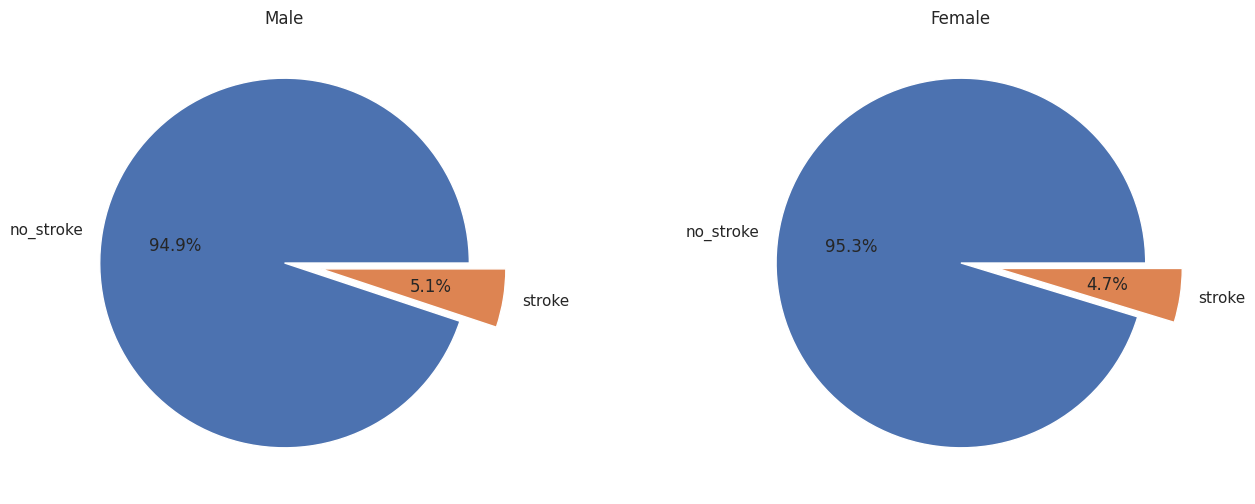

In [58]:
plt.figure(figsize=(16 , 6))
plt.subplot(1 , 2 , 1)
plt.pie(stroke_male,labels=label,  autopct='%1.1f%%', explode=(0 , 0.2))
plt.title('Male')
plt.subplot(1 , 2 , 2)
plt.pie(stroke_female,labels=label,  autopct='%1.1f%%', explode=(0 , 0.2))
plt.title('Female')

**Analyse de l'influence du sexe:**
On constate que, même si la proportion de personnes de sexe masculin est légèrement supérieure à celle des femmes, la différence de fréquence des AVC entre les deux groupes reste faible.
 Cela suggère que le sexe n’a pas une grande influence sur la prédiction des AVC dans ce dataset.



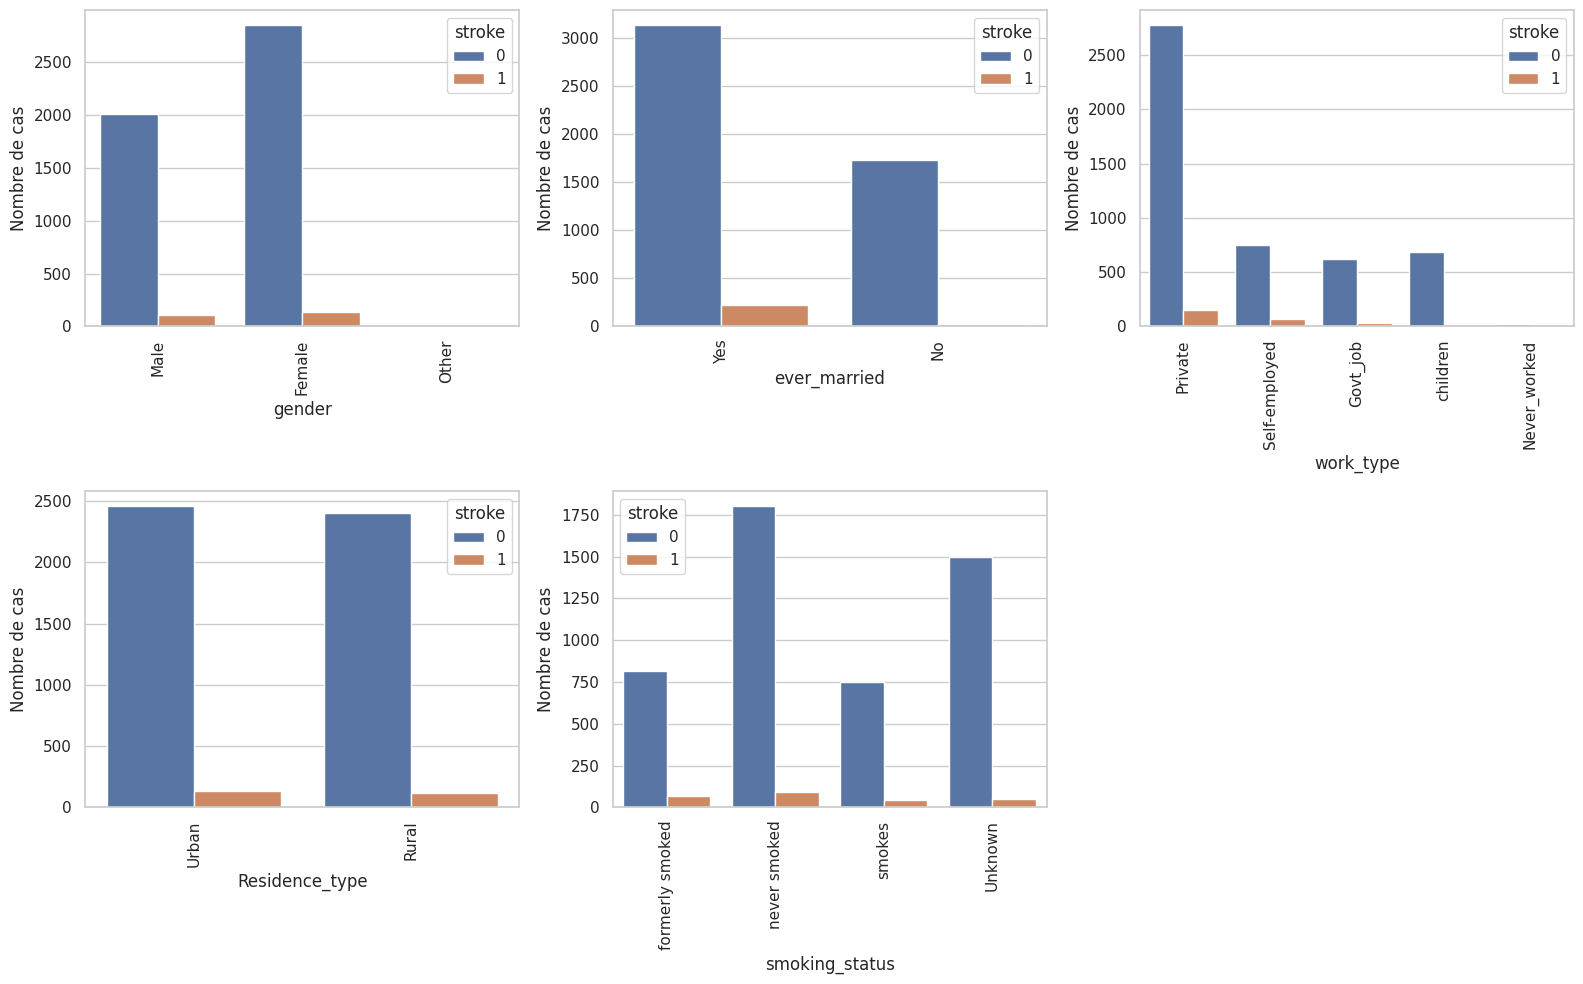

In [59]:
#Detection des colonne de type 'objet'
Object_features=[]
for col in df.select_dtypes(include='object'):
  Object_features.append(col)
#Relation avec la variable 'stroke'
plt.figure(figsize=(16,10))
for i, feature in enumerate(Object_features):
  plt.subplot(2, 3, i+1)
  sb.countplot(data=df, x=feature, hue='stroke')
  plt.xlabel(feature)
  plt.xticks(rotation='vertical')
  plt.ylabel('Nombre de cas')
plt.tight_layout()

In [68]:
df_married=df[df['ever_married']=='Yes']
df_not_married=df[df['ever_married']=='No']


In [69]:
stroke_married=df_married['stroke'].value_counts()
stroke_not_married=df_not_married['stroke'].value_counts()

Text(0.5, 1.0, 'Non_marriée')

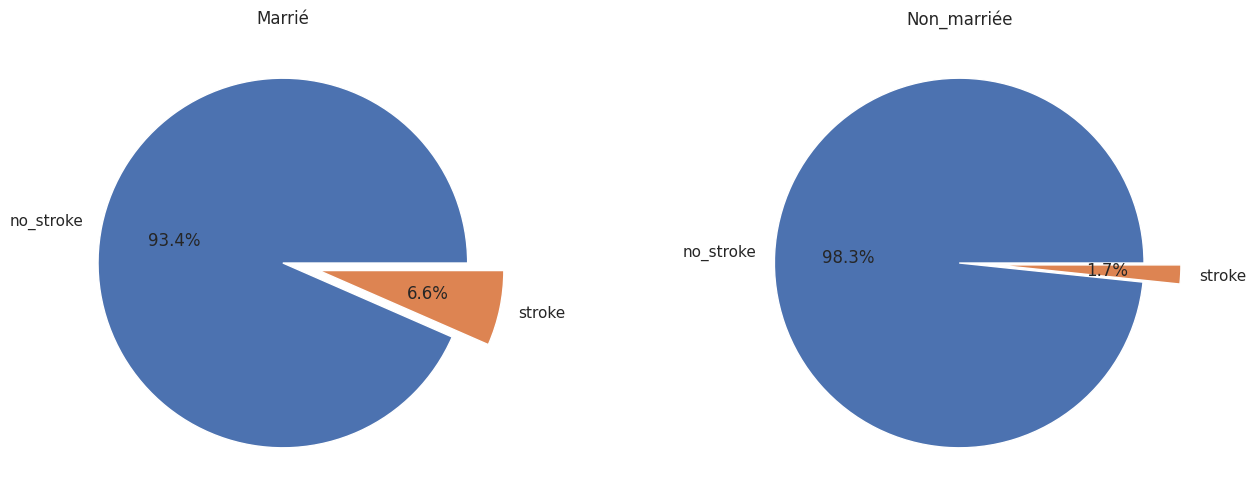

In [70]:
plt.figure(figsize=(16, 6))
plt.subplot(1  , 2 , 1)
plt.pie(stroke_married, labels=label, autopct='%1.1f%%', explode=(0 , 0.2))
plt.title('Marrié')
plt.subplot(1  , 2 , 2)
plt.pie(stroke_not_married, labels=label, autopct='%1.1f%%', explode=(0 , 0.2))
plt.title('Non_marriée')

**Analyse de l'effet du marriage**

Les patients ayant déjà été mariés (Yes) semblent présenter un risque d’AVC légèrement supérieure à ceux n’ayant jamais été mariés (No).

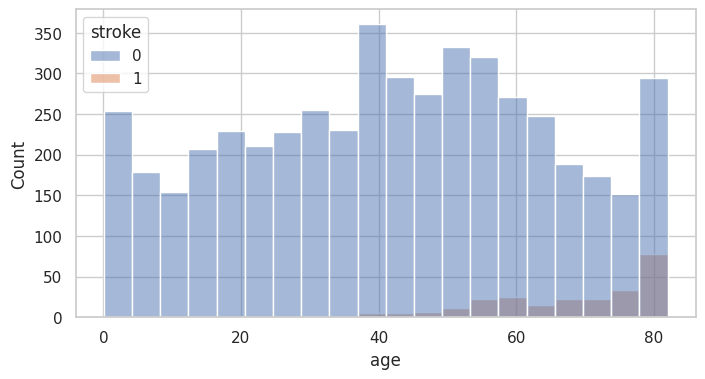

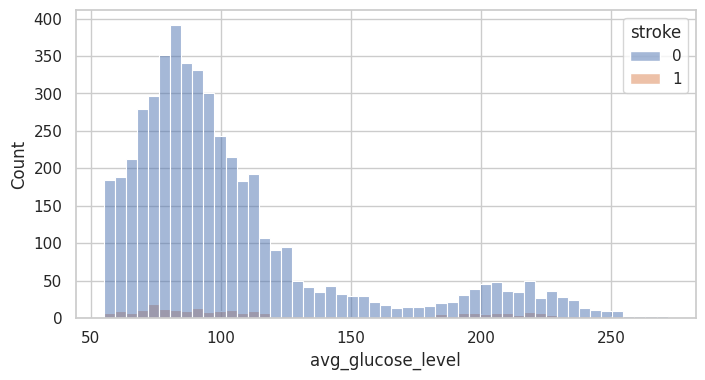

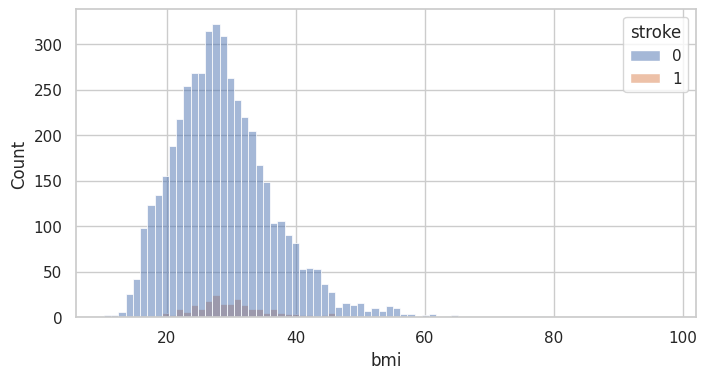

In [ ]:
Float_features=[]

for col in df.select_dtypes(include='float64'):
  Float_features.append(col)
for i in Float_features:
  plt.figure(figsize=(8,4))
  sb.histplot(data=df, x=i, hue='stroke')
  plt.xlabel(i)

In [76]:
df_diabétique=df[df['avg_glucose_level']>150]
df_non_diabétique=df[df['avg_glucose_level']<=150]


In [77]:
stroke_diabétique=df_diabétique['stroke'].value_counts()
stroke_non_diabétique=df_non_diabétique['stroke'].value_counts()


Text(0.5, 1.0, 'Diabétique')

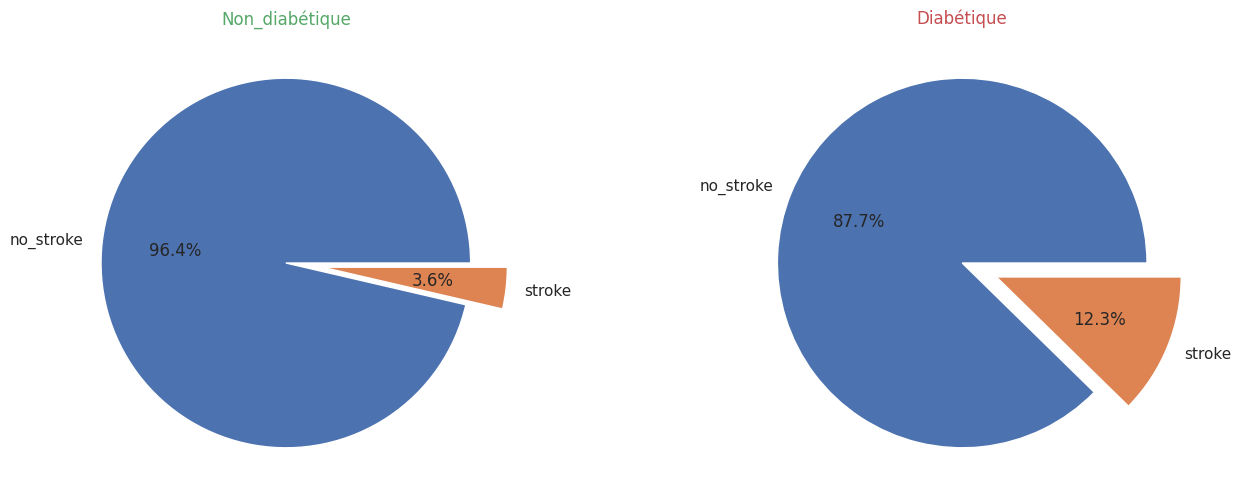

In [90]:
plt.figure(figsize=(16 , 6))
plt.subplot(1, 2, 1)
plt.pie(stroke_non_diabétique, labels=label, autopct='%1.1f%%', explode=(0 , 0.2))
plt.title('Non_diabétique', color='g')
plt.subplot(1, 2, 2)
plt.pie(stroke_diabétique, labels=label, autopct='%1.1f%%', explode=(0 , 0.2))
plt.title('Diabétique', color='r')

**Analyse de l'effet de gluocose sur l'AVC**

L’analyse montre que les personnes diabétiques ont un risque d’AVC plus élevé que celles qui ne souffrent pas de diabète, ce qui est en accord avec les connaissances médicales établies.

**Analyse de BMI**

on le fait aprés le remplissage des valeurs manquantes

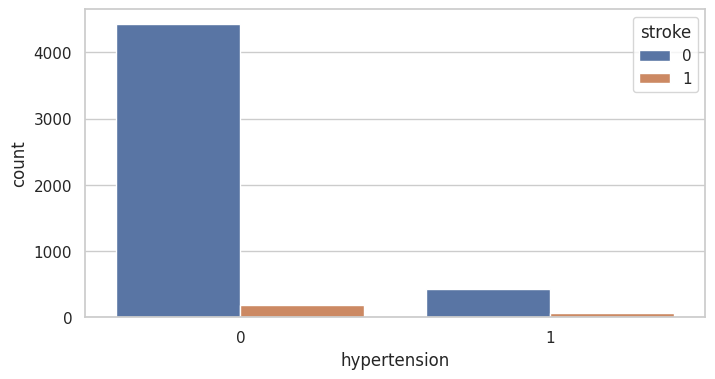

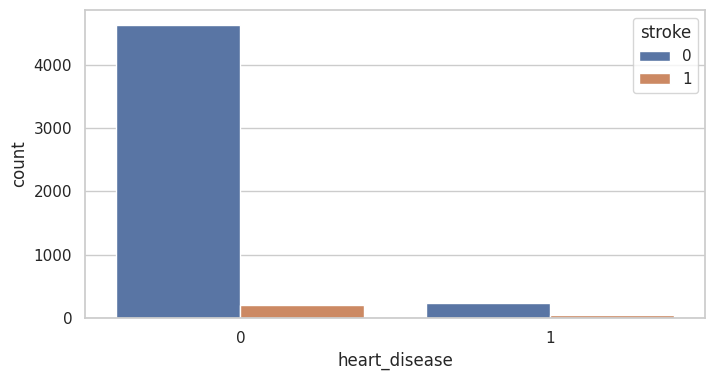

In [ ]:
#Int_features
int_features=[]
for col in df.select_dtypes(include='int64'):
  int_features.append(col)
#Analyse des données de types 'int64'
for i in int_features:
  if i=='id' or i=='stroke':
    continue;
  else:
    plt.figure(figsize=(8,4))
    sb.countplot(data=df, x=i, hue='stroke')


In [81]:
df_non_hypertension=df[df['hypertension']==0]
df_hypertension=df[df['hypertension']==1]

In [82]:
stroke_non_hypertension=df_non_hypertension['stroke'].value_counts()
stroke_hypertension=df_hypertension['stroke'].value_counts()

Text(0.5, 1.0, 'Hyptension')

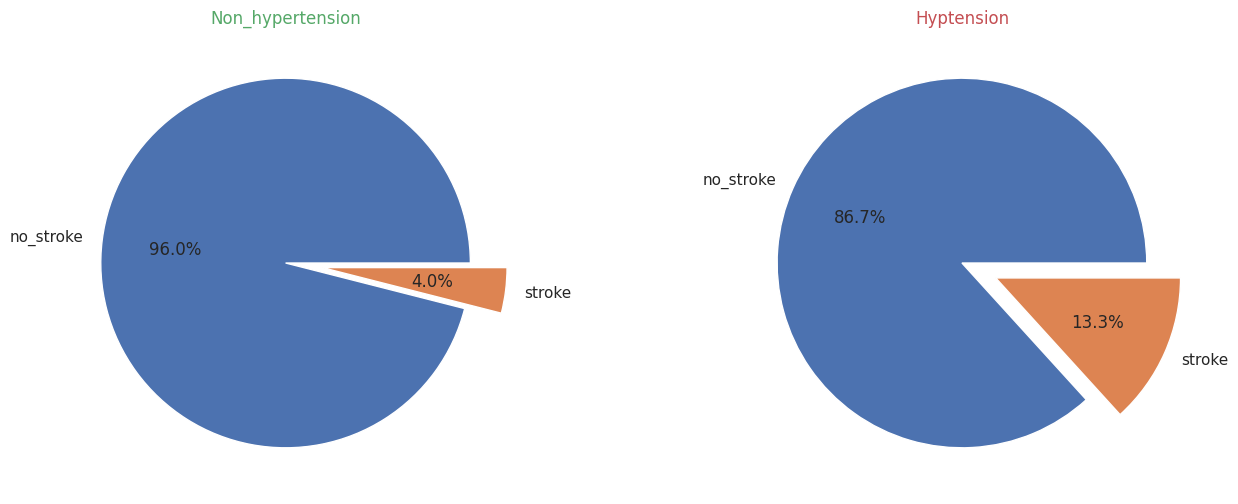

In [89]:
plt.figure(figsize=(16 , 6))
plt.subplot(1 , 2 , 1)
plt.pie(stroke_non_hypertension, labels=label, autopct='%1.1f%%', explode=(0 , 0.2))
plt.title('Non_hypertension', color='g')
plt.subplot(1 , 2 , 2)
plt.pie(stroke_hypertension, labels=label, autopct='%1.1f%%', explode=(0 , 0.2))
plt.title('Hyptension', color='r')


**Analyse de l'effet de hl'hypertension**

Les personnes souffrant d’hypertension ont tendance à présenter un risque d’AVC plus élevé que celles qui n’en souffrent pas.

In [91]:
df_non_heart_disease=df[df['heart_disease']==0]
df_heart_disease=df[df['heart_disease']==1]

In [92]:
stroke_non_heart_disease=df_non_heart_disease['stroke'].value_counts()
stroke_heart_disease=df_heart_disease['stroke'].value_counts()

Text(0.5, 1.0, 'Problemes cardiaques')

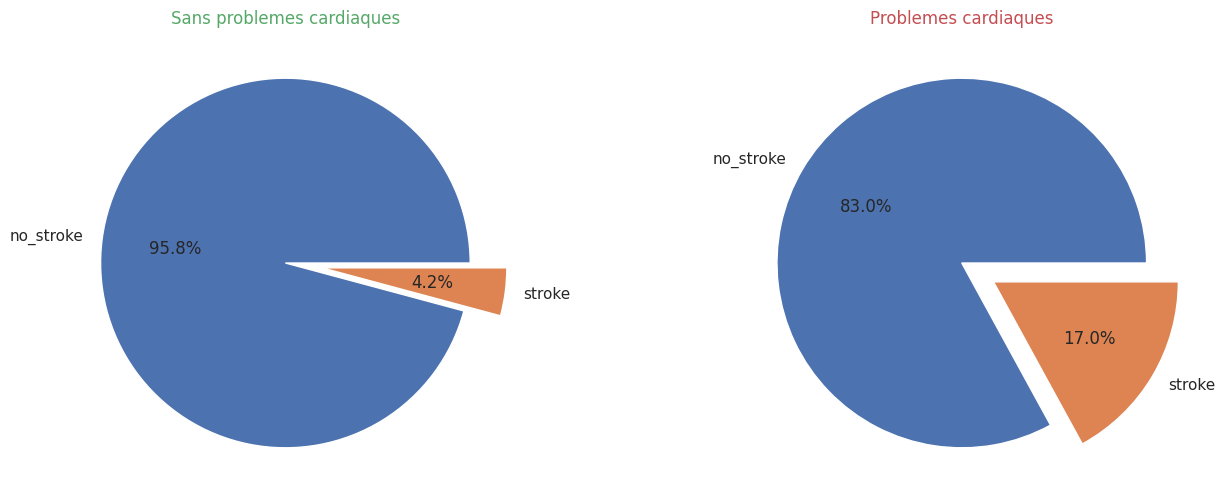

In [96]:
plt.figure(figsize=(16, 6))
plt.subplot(1 , 2 , 1)
plt.pie(stroke_non_heart_disease, labels=label, autopct='%1.1f%%', explode=(0 , 0.2) )
plt.title('Sans problemes cardiaques', color='g')
plt.subplot(1 , 2 , 2)
plt.pie(stroke_heart_disease, labels=label, autopct='%1.1f%%', explode=(0 , 0.2) )
plt.title('Problemes cardiaques', color='r')

**Analyse de l'effet des problemes cardiaques**

Les personnes ayant des antécédents de maladies cardiaques présentent un risque plus élevé d’AVC que celles qui n’en ont pas.

Text(0.5, 1.0, 'Nuage de points:AGE vs BMI coloré par AVC ')

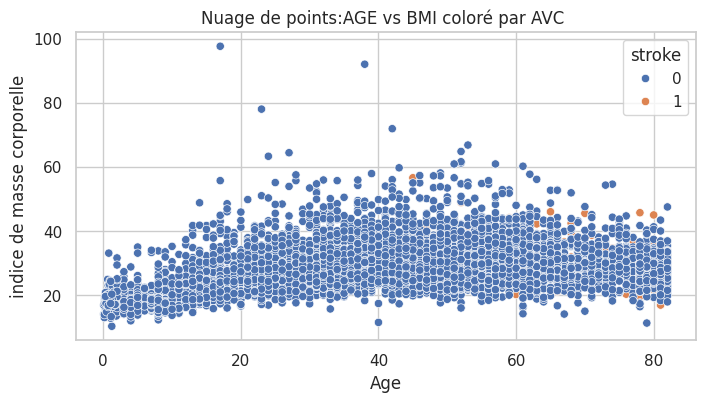

In [97]:
#Nuage de points:AGE vs BMI coloré par AVC
plt.figure(figsize=(8,4))
sb.scatterplot(data=df, x='age', y='bmi', hue='stroke')
plt.xlabel('Age')
plt.ylabel('indice de masse corporelle')
plt.title('Nuage de points:AGE vs BMI coloré par AVC ')

**Effet combiné de l’âge et de l’IMC sur le risque d’AVC :**

Les premières observations suggèrent que les personnes âgées ayant un indice de masse corporelle (BMI) élevé semblent être plus susceptibles de subir un AVC que les autres.
Cependant, cette conclusion reste à confirmer, car certaines valeurs de la variable bmi sont encore manquantes et n'ont pas encore été imputées.



Text(0.5, 1.0, 'Nuage de point AGE vs Niveau de glucose')

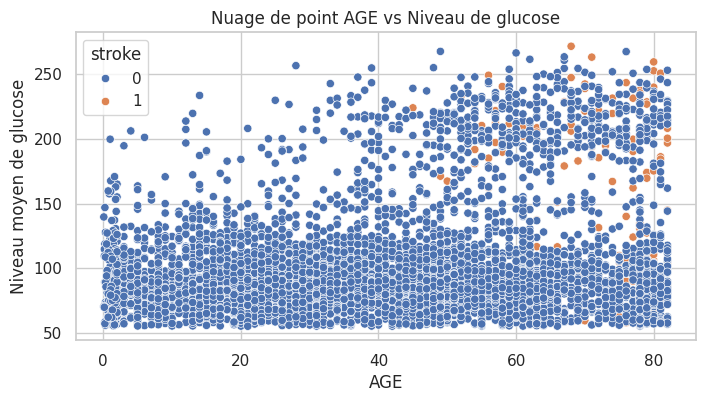

In [98]:
#Nuage de point AGE vs Niveau de Glucose
plt.figure(figsize=(8,4))
sb.scatterplot(data=df, x='age', y='avg_glucose_level', hue='stroke')
plt.xlabel('AGE')
plt.ylabel('Niveau moyen de glucose')
plt.title('Nuage de point AGE vs Niveau de glucose')

**Effet combiné de l'age et le niveau de glucose**

les personnes agées diabétiques sont les plus susceptibles à avoir des AVC

<Axes: >

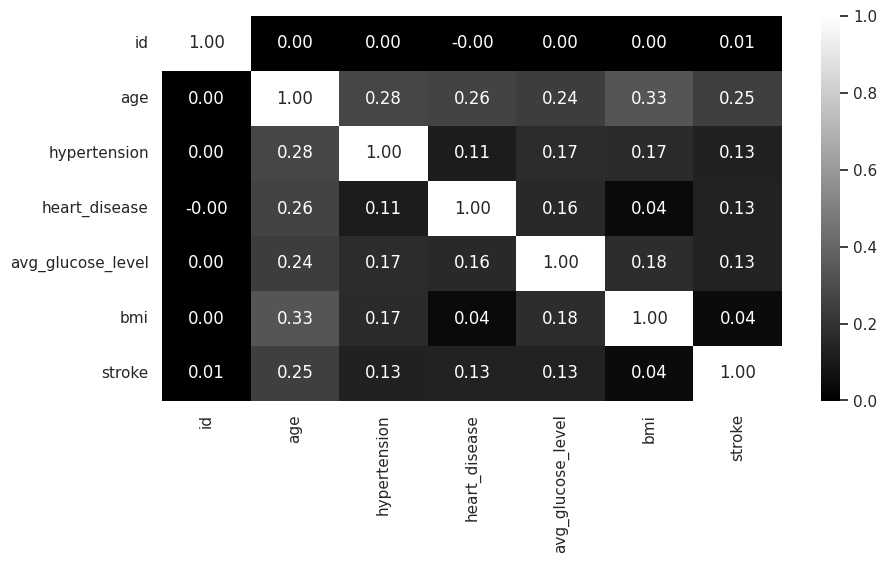

In [101]:
#Correleation des differentes variables avec stroke
plt.figure(figsize=(10,5))
sb.heatmap(df.corr(numeric_only=True), fmt=".2f", annot=True, cmap='gray')


**Analyse de la carte de corrélation**

Analyse comparative des variables numériques :
Parmi les variables numériques, l’âge apparaît comme le facteur ayant le plus d’impact sur l’occurrence des AVC, tandis que l’indice de masse corporelle (BMI) semble être le moins influent dans notre analyse exploratoire.

__Nettoyage et préparation des données__

In [102]:
#Valeurs abberantes ne sont présentes que dans la colonne 'bmi'
df[df['bmi'].isnull()].head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
13,8213,Male,78.0,0,1,Yes,Private,Urban,219.84,NaN,Unknown,1
19,25226,Male,57.0,0,1,No,Govt_job,Urban,217.08,NaN,Unknown,1
27,61843,Male,58.0,0,0,Yes,Private,Rural,189.84,NaN,Unknown,1


In [103]:
#Nombre de val abbérantes dans la colonne 'bmi'
df['bmi'].isnull().sum()

np.int64(201)

In [104]:
#Remplissage des NAs dans la colonne bmi par la mediane
df['bmi'].fillna(df['bmi'].median(), inplace=True)

<ipython-input-104-4a43db8ae24e>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['bmi'].fillna(df['bmi'].median(), inplace=True)


**Pourquoi la mediane**

Nous avons choisi d’imputer les valeurs manquantes de la variable bmi par la médiane, car cette méthode n’est pas sensible aux valeurs extrêmes (ou outliers), contrairement à la moyenne qui peut être fortement influencée par des valeurs anormalement élevées ou faibles.



In [105]:
#Vérification du résultat de remplissage
df['bmi'].isnull().sum()

np.int64(0)

In [106]:
#Suppression de touts des NANs
df[df['bmi'].isnull()].head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke


<Axes: >

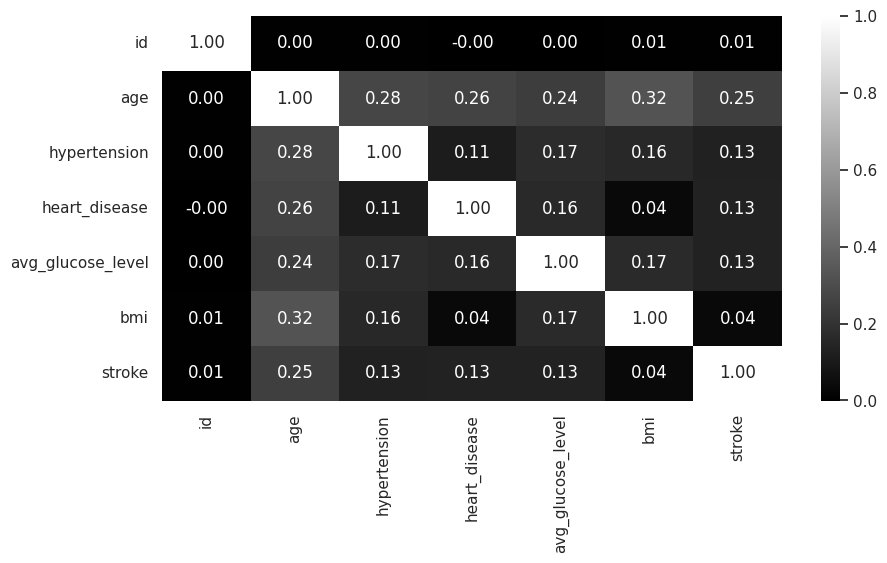

In [109]:
#Vérification de corrélation après la suppression des NANs
plt.figure(figsize=(10 , 5))
sb.heatmap(df.corr(numeric_only=True), annot=True, cmap='gray', fmt='.2f')

On constate que meme aprés le remplssage des valeurs manquantes, le BMI reste le facteur le moins influent sur l'AVC

In [111]:
#Suppression du sexe 'other' dans la colonne 'gender' commen c'est très rare (un seul cas)
df=df[df['gender'] != 'Other']
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [112]:
#vérification de la suppression du sexe 'Other'
df['gender'].value_counts(normalize=True)*100

,proportion
gender,
Female,58.602466
Male,41.397534


In [113]:
#Binarisation des données de type 'objet'
df_encoded=pd.get_dummies(df, drop_first=True).astype('int')
df_encoded.head()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,67,0,1,228,36,1,1,1,0,1,0,0,1,1,0,0
1,51676,61,0,0,202,28,1,0,1,0,0,1,0,0,0,1,0
2,31112,80,0,1,105,32,1,1,1,0,1,0,0,0,0,1,0
3,60182,49,0,0,171,34,1,0,1,0,1,0,0,1,0,0,1
4,1665,79,1,0,174,24,1,0,1,0,0,1,0,0,0,1,0


In [114]:
#Séparation des données features-cibles
X=df_encoded.drop('stroke', axis=1)
X=X.drop('id', axis=1)
X.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Male,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67,0,1,228,36,1,1,0,1,0,0,1,1,0,0
1,61,0,0,202,28,0,1,0,0,1,0,0,0,1,0
2,80,0,1,105,32,1,1,0,1,0,0,0,0,1,0
3,49,0,0,171,34,0,1,0,1,0,0,1,0,0,1
4,79,1,0,174,24,0,1,0,0,1,0,0,0,1,0


In [115]:
#Séparation des données features-cibles
Y=df_encoded['stroke']
Y.head()

,stroke
0,1
1,1
2,1
3,1
4,1


In [118]:
#Standarisation manuelle
eca_type_X=X.std(numeric_only=True)
mean_X=X.mean(numeric_only=True)
X_scaled_manual=(X-mean_X)/eca_type_X
X_scaled_manual.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Male,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1.050655,-0.328605,4.184190,2.702250,0.984277,1.189675,0.723607,-0.065756,0.864360,-0.436889,-0.394118,0.983788,2.185973,-0.766818,-0.427321
1,0.785576,-0.328605,-0.238948,2.128004,-0.056210,-0.840401,0.723607,-0.065756,-1.156699,2.288465,-0.394118,-1.016281,-0.457373,1.303834,-0.427321
2,1.624992,-0.328605,4.184190,-0.014378,0.464034,1.189675,0.723607,-0.065756,0.864360,-0.436889,-0.394118,-1.016281,-0.457373,1.303834,-0.427321
3,0.255419,-0.328605,-0.238948,1.443325,0.724156,-0.840401,0.723607,-0.065756,0.864360,-0.436889,-0.394118,0.983788,-0.457373,-0.766818,2.339704
4,1.580812,3.042569,-0.238948,1.509584,-0.576453,-0.840401,0.723607,-0.065756,-1.156699,2.288465,-0.394118,-1.016281,-0.457373,1.303834,-0.427321


In [120]:
#Standarisation en utilsant sklearn
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_scaled_sk=scaler.fit_transform(X)

In [121]:
#Comparaison des résultats
from sklearn.metrics import r2_score

r2=r2_score(X_scaled_manual, X_scaled_sk)

print(f"le coefficient de détermination est {r2:.2f}")


le coefficient de détermination est 1.00


**  Comparaison des resultats**

On constate que les resultats des deux méthodes sont bien corrélés, ce qui démontre que notre implémentation est correcte

In [122]:
#On choisit l'un des résultats pour le reste du travail
X_scaled=X_scaled_sk

__Création du modèle__

In [128]:
#Séparation des données train_test
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test=train_test_split(X_scaled, Y, test_size=0.3, random_state=42, stratify=Y)

In [129]:
Y_test.value_counts()

,count
stroke,
0,1458
1,75


In [130]:
#On commence par le modèle simple Logistic Regression
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(max_iter=1500)
model.fit(X_train, Y_train)

LogisticRegression(max_iter=1500)

In [131]:
Y_predict=model.predict(X_test)

In [132]:
ones=0
zeros=0
for i in Y_predict:
  if i==1:
    ones=ones+1
  else:
    zeros=zeros+1
print(f"predicted_stroke={ones},\npredicted non_stroke={zeros}")


predicted_stroke=2,
predicted non_stroke=1531


In [133]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(Y_predict, Y_test))

              precision    recall  f1-score   support

           0       1.00      0.95      0.98      1531
           1       0.03      1.00      0.05         2

    accuracy                           0.95      1533
   macro avg       0.51      0.98      0.51      1533
weighted avg       1.00      0.95      0.97      1533



Text(0.5, 1.0, 'Matrice de confusion')

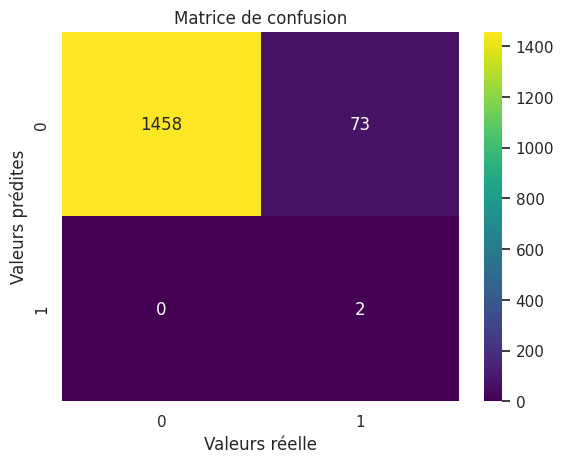

In [138]:
cm=confusion_matrix(Y_predict, Y_test)

plt.figure()
sb.heatmap(data=cm, annot=True, cmap='viridis', fmt='d')
plt.xlabel('Valeurs réelle')
plt.ylabel('Valeurs prédites')
plt.title('Matrice de confusion')

**Analyse de la matrice de confusion**

Le modèle a été évalué sur un ensemble de 1533 exemples. Voici un résumé des prédictions :

*1458 cas de non-AVC (stroke = 0) ont été correctement prédits comme tels.

*73 cas de non-AVC ont été incorrectement prédits comme AVC (faux positifs).

*2 cas d’AVC (stroke = 1) ont été correctement détectés.

*Aucun cas d’AVC n’a été manqué (c’est-à-dire qu’il n’y a aucun faux négatif).

Conclusion

Synthèse de l'Analyse des Facteurs de Risque d'AVC
Cette analyse exploratoire des données sur les accidents vasculaires cérébraux a permis de mettre en évidence plusieurs facteurs de risque significatifs et d'établir une base solide pour de futures analyses prédictives.
Principaux enseignements
Notre exploration a révélé plusieurs tendances importantes :
L'âge apparaît comme un facteur de risque majeur, avec une augmentation significative de l'incidence des AVC chez les personnes âgées de plus de 60 ans.
L'hypertension et les maladies cardiaques préexistantes sont fortement associées à un risque accru d'AVC, confirmant les connaissances médicales établies sur ces comorbidités.
Le niveau de glucose sanguin élevé montre une corrélation positive avec la survenue d'AVC, soulignant l'importance du contrôle glycémique dans la prévention.
L'indice de masse corporelle (IMC) présente également une association avec le risque d'AVC, bien que cette relation soit moins prononcée que pour d'autres facteurs.
Les facteurs démographiques comme le genre et le type de résidence (urbain/rural) semblent avoir un impact plus modéré sur le risque d'AVC dans notre jeu de données.
Limites de l'étude
Cette analyse présente certaines limitations qu'il convient de mentionner :
Le jeu de données contient des valeurs manquantes, notamment pour l'IMC, ce qui a nécessité des techniques d'imputation pouvant introduire des biais.
Le déséquilibre entre les cas positifs (AVC) et négatifs (non-AVC) peut affecter l'interprétation des résultats.
Les associations observées sont corrélationnelles et non causales, nécessitant une validation clinique supplémentaire.
Perspectives futures
Cette analyse exploratoire ouvre la voie à plusieurs développements prometteurs :
Modélisation prédictive : Développer des modèles de machine learning (régression logistique, random forest, etc.) pour prédire le risque d'AVC à partir des facteurs identifiés.
Stratification du risque : Créer un système de score permettant d'identifier les patients à haut risque nécessitant une surveillance accrue.
Analyse d'interactions : Explorer plus en profondeur les interactions entre différents facteurs de risque pour mieux comprendre leurs effets combinés.
Application pratique : Concevoir un outil d'aide à la décision pour les professionnels de santé, facilitant l'identification précoce des patients à risque.
En conclusion, cette analyse exploratoire constitue une première étape importante dans la compréhension des facteurs de risque d'AVC. Les résultats obtenus fournissent une base solide pour des recherches plus approfondies et le développement d'outils prédictifs qui pourraient contribuer à réduire l'incidence et l'impact des accidents vasculaires cérébraux dans la population.